# Expressão gênica e clustering
####  Pedro Henrique de Almeida - 148526
<br>
Um problema comum da bioinformática é encontrar funções de um gene específico. Uma das formas de se fazer isso é comparando um gene que se quer entender melhor com outros genes, a partir de sua expressão gênica. Assim, geramos uma matriz de intensidade que contempla diferentes valores de expressão gênica em diferentes condições de experimento. Com ela, podemos então aplicar algoritmos de inteligência artificial como KMeans para dividir esses genes em clusters e então inferir algo sobre o nosso gene de interesse.
<br><br>
Este projeto tem por finalidade, aplicar esta técnica num conjunto de dados contendo 4380 genes da levedura CDC15. É omitido um número
de colunas para que possamos observar essa aplicação mais nitidamente. 


Source: http://www.exploredata.net/Downloads/Gene-Expression-Data-Set

In [1]:
# Data handling
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

#Lloyd's algorithm
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(".\Spellman.csv", sep=',')
df = df[['40', '240']]
points = df.to_numpy()
display(df)

,40,240
0,-0.070,0.57
1,0.215,-0.10
2,0.150,-0.34
3,-0.350,1.01
4,-0.415,0.57
...,...,...
4376,-0.060,0.40
4377,0.155,0.14
4378,-0.255,0.84
4379,0.570,-0.12


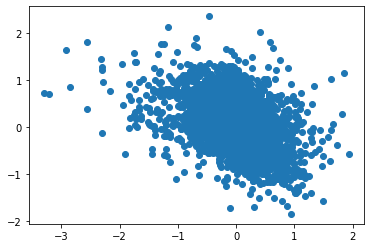

In [3]:
plt.scatter(points[:,0], points[:,1])

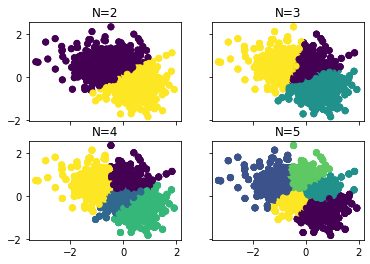

In [4]:
fig, axs = plt.subplots(2, 2)

n=2

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_2_2d = kmeans.fit_predict(points)

axs[0, 0].set_title(f"N={n}")
for i in range(n):
    axs[0, 0].scatter(points[:,0], points[:,1], c=y_km_2_2d)

#

n = 3

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_3_2d = kmeans.fit_predict(points)

axs[0, 1].set_title(f"N={n}")
for i in range(n):
    axs[0, 1].scatter(points[:,0], points[:,1], c=y_km_3_2d)
    
#

n=4

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_4_2d = kmeans.fit_predict(points)

axs[1, 0].set_title(f"N={n}")
for i in range(n):
    axs[1, 0].scatter(points[:,0], points[:,1], c=y_km_4_2d)
    
#

n=5

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_5_2d = kmeans.fit_predict(points)

axs[1, 1].set_title(f"N={n}")
for i in range(n):
    axs[1, 1].scatter(points[:,0], points[:,1], c=y_km_5_2d)
    
for ax in axs.flat:
    ax.label_outer()

plt.show()

In [25]:
df2 = pd.read_csv(".\Spellman.csv", sep=',')
df2 = df2[['40', '140', '240']]
points = df2.to_numpy()
display(df2)

,40,140,240
0,-0.070,0.06,0.57
1,0.215,-0.19,-0.10
2,0.150,-0.08,-0.34
3,-0.350,-0.07,1.01
4,-0.415,0.31,0.57
...,...,...,...
4376,-0.060,0.13,0.40
4377,0.155,-0.25,0.14
4378,-0.255,0.23,0.84
4379,0.570,1.12,-0.12


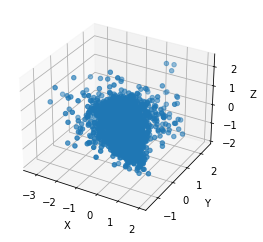

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = points[:,0], points[:,1], points[:,2]
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(X, Y, Z)

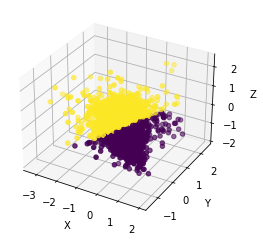

In [27]:
n=2

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_2_3d = kmeans.fit_predict(points)

fig = plt.figure()
bx = fig.add_subplot(111, projection='3d')
bx.set_xlabel("X")
bx.set_ylabel("Y")
bx.set_zlabel("Z")
bx.scatter(X,Y,Z, c=y_km_2_3d)

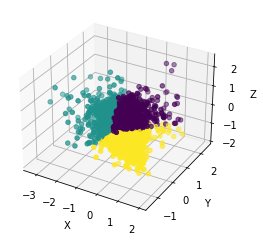

In [28]:
n=3

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_3_3d = kmeans.fit_predict(points)

fig = plt.figure()
cx = fig.add_subplot(111, projection='3d')
cx.set_xlabel("X")
cx.set_ylabel("Y")
cx.set_zlabel("Z")
cx.scatter(X,Y,Z, c=y_km_3_3d)

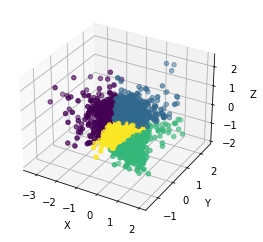

In [29]:
n=4

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_4_3d = kmeans.fit_predict(points)

fig = plt.figure()
dx = fig.add_subplot(111, projection='3d')
dx.set_xlabel("X")
dx.set_ylabel("Y")
dx.set_zlabel("Z")
dx.scatter(X,Y,Z, c=y_km_4_3d)

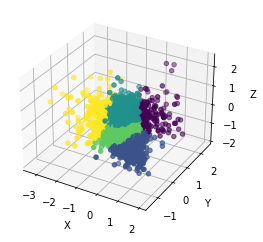

In [10]:
n=5

kmeans = KMeans(n_clusters=n, random_state=1)
kmeans.fit(points)
clusters = kmeans.cluster_centers_
y_km_5_3d = kmeans.fit_predict(points)

fig = plt.figure()
ex = fig.add_subplot(111, projection='3d')
ex.set_xlabel("X")
ex.set_ylabel("Y")
ex.set_zlabel("Z")
ex.scatter(X,Y,Z, c=y_km_5_3d)

In [11]:
k_2, k_3, k_4, k_5 = 0, 0, 0, 0
for i in range(len(points)):
    if y_km_2_2d[i] == y_km_2_3d[i]:
        k_2 += 1
    if y_km_3_2d[i] == y_km_3_3d[i]:
        k_3 += 1
    if y_km_4_2d[i] == y_km_4_3d[i]:
        k_4 += 1
    if y_km_5_2d[i] == y_km_5_3d[i]:
        k_5 += 1
print(f"Difference with K = 2: {k_2}\nDifference with K = 3: {k_3}\nDifference with K = 4: {k_4}\nDifference with K = 5: {k_5}")

Difference with K = 2: 227
Difference with K = 3: 1703
Difference with K = 4: 912
Difference with K = 5: 271
